In [1]:
# local machine only
import sys
sys.path.append('/home/bp/devel/mupif.git')
sys.path.append('/home/eudoxos/build/mupif')

import matplotlib
# make figures larger
# matplotlib.rcParams['figure.figsize']=(20,20)

# this is ugly
# examples are not part of the mupif module now, thus are copied locally, should be re-considered
sys.path.append('.')
import models

In [2]:
import mupif as mp

In [3]:
thermalSolver = models.ThermalModel()
thermalSolver.getApplicationSignature()

'Stationary thermal-demo-solver, ver 1.0'

In [4]:
mechanicalSolver = models.MechanicalModel()
mechanicalSolver.getApplicationSignature()

'Mechanical-demo-solver, ver 1.0'

In [5]:
thermalSolver.initialize('inputT.in')
mechanicalSolver.initialize('inputM.in')

In [6]:
# show the input file
print(open('inputT.in').read())

# Model edges
#     ----------3----------
#     |                   |
#     4                   2
#     |                   | 
#     ----------1---------
#
5 1 #Size x and y
10 5 #Number of elements in x and y
1 N 0. #Domain edge number 1 with boundary condition (D-Dirichlet, C-convection, other-None), prescribed temperature/ambient temperature
2 N 0.
3 N 0.
4 N 0.




In [7]:
thermalSolver.getMetadata('Inputs')

[{'Name': 'edge temperature',
  'Type': 'mupif.Property',
  'Required': False,
  'Type_ID': 'mupif.PropertyID.PID_Temperature',
  'Obj_ID': ['Cauchy top',
   'Cauchy bottom',
   'Cauchy left',
   'Cauchy right',
   'Dirichlet top',
   'Dirichlet bottom',
   'Dirichlet left',
   'Dirichlet right']}]

In [8]:
thermalSolver.initialize('inputT.in')
bc1 = mp.ConstantProperty(propID=mp.PropertyID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(50,), unit=mp.U['K'])
bc2 = mp.ConstantProperty(propID=mp.PropertyID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(0,), unit=mp.U['K'])
thermalSolver.set(bc1, 'Cauchy top')
thermalSolver.set(bc2, 'Dirichlet left')
thermalSolver.set(bc2, 'Cauchy bottom')

In [9]:
thermalSolver.bcOnModelEdges

[(3, 'C', 50.0, 1.0), (4, 'D', 0.0, None), (1, 'C', 0.0, 1.0)]

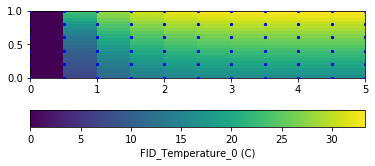

In [10]:
# solve something (whatever)
thermalSolver.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))
# show the field
f=thermalSolver.getField(fieldID=mp.FieldID.FID_Temperature,time=1.*mp.Q.s)
f.plot2D()

In [11]:
mechanicalSolver.set(f)
mechanicalSolver.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))

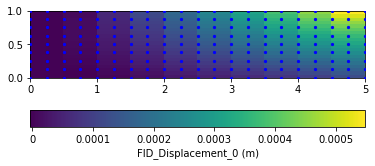

In [12]:
f=mechanicalSolver.getField(fieldID=mp.FieldID.FID_Displacement,time=1.*mp.Q.s)
f.plot2D()

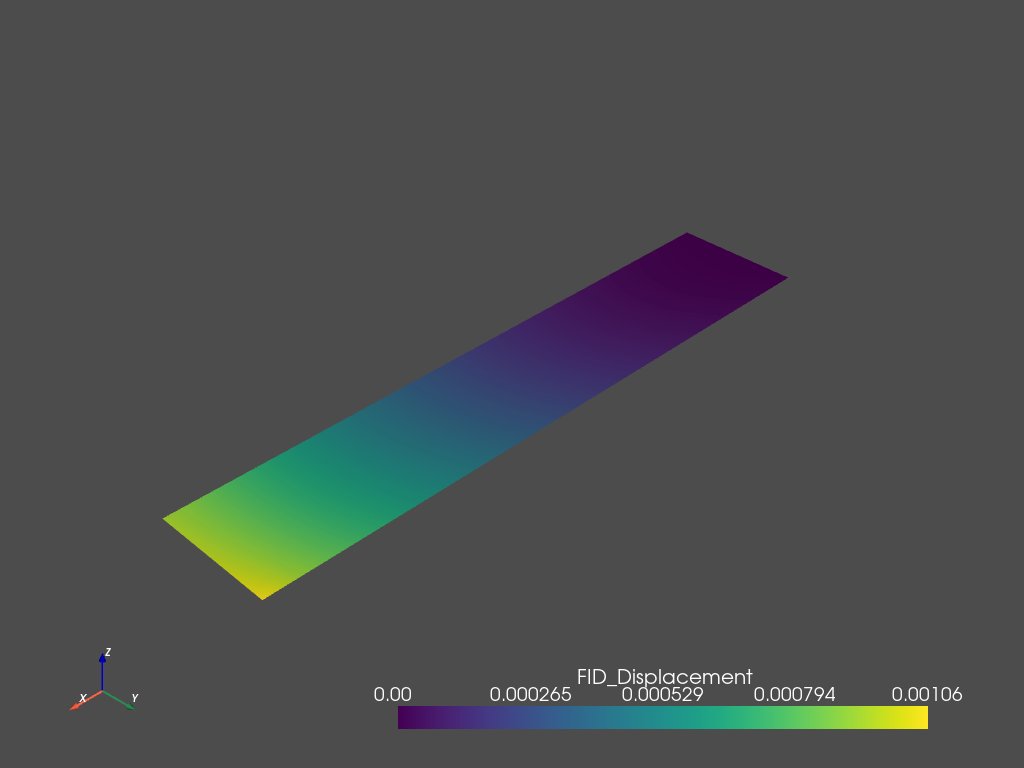

[(8.187217274930124, 6.187217274930123, 5.687217274930123),
 (2.5, 0.5, 0.0),
 (0.0, 0.0, 1.0)]

In [13]:
import pyvista as pv
f.toMeshioMesh().write('m.vtu')
m2=pv.read('m.vtu')
m2.plot()

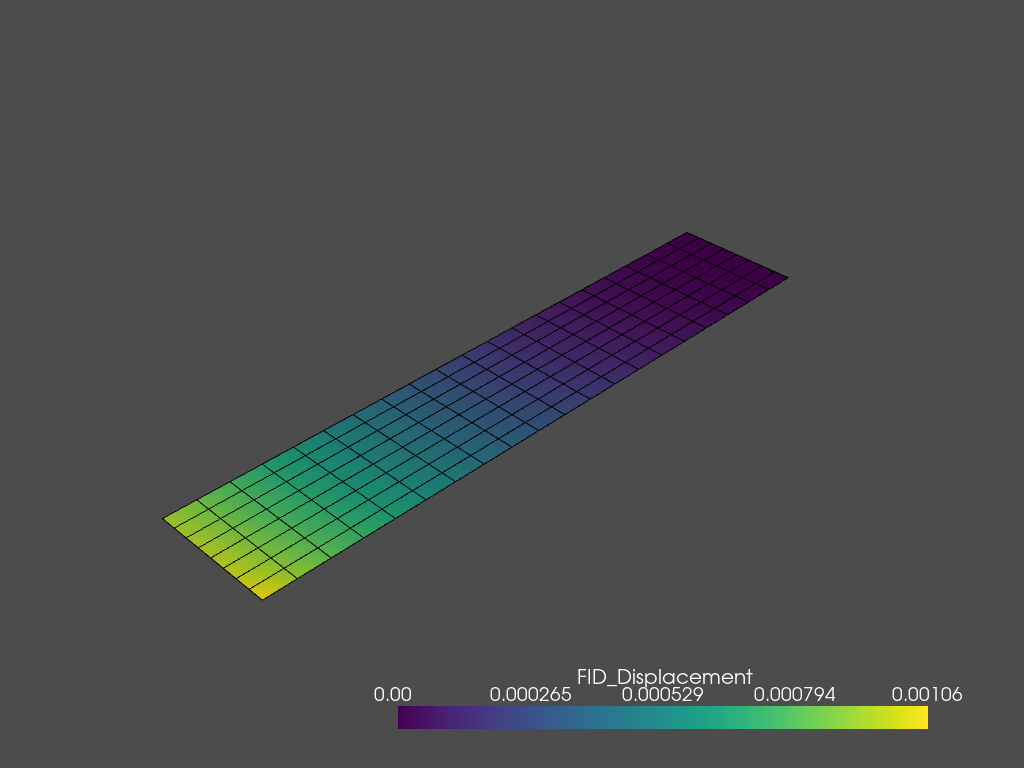

[(8.187217274930124, 6.187217274930123, 5.687217274930123),
 (2.5, 0.5, 0.0),
 (0.0, 0.0, 1.0)]

In [14]:
p=pv.Plotter()
p.add_mesh(m2,show_edges=True)
p.show()

In [15]:
# https://github.com/InsightSoftwareConsortium/itkwidgets#installation
import itkwidgets
itkwidgets.view(m2)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[])